In [2]:
import numpy as np
import Functions
import pickle
import os
from matplotlib.colors import LogNorm
import time
import Functions

import matplotlib.pyplot as plt

In [3]:
plt.rcParams['font.size'] = '16'

In [6]:
PathCubeFolder = '/global/cscratch1/sd/lianming/Results/FullRun_10kObj_220802'
CubeFileNames = os.listdir(PathCubeFolder)

EventNames = ['AGN', 'CART', 'EB', 'ILOT', 'KN_B19', 'KN_K17', 'MIRA', 'Mdwarf',
              'PISN', 'RRL', 'SLSN-I', 'SNII-NMF', 'SNII-Templates', 'SNIIn',
              'SNIa-91bg', 'SNIa-SALT2', 'SNIax', 'SNIbc-MOSFIT',
              'SNIbc-Templates', 'TDE', 'V19_CC+HostXT', 'uLens-Binary',
              'uLens-Single-GenLens', 'uLens-Single_PyLIMA']

In [8]:
def Enquiry(HashTable, InfoDict, Band1, Band2, dT1, dT2, dMag=None, Color=None):
    
    if abs(dT1) > abs(dT1-dT2):
        dT1, dT2 = dT1-dT2, -dT2    

    Ind1 = InfoDict['BandPairs'].index(Band1+Band2)
    
    dT1grid = InfoDict['dT1s'][ abs( dT1 - InfoDict['dT1s'] ).argmin() ]
    dT2grid = InfoDict['dT2s'][ abs( dT2 - InfoDict['dT2s'] ).argmin() ]
    
    TimePairGrid = [ InfoDict['dT1s'][ abs( dT1 - InfoDict['dT1s'] ).argmin() ], InfoDict['dT2s'][ abs( dT2 - InfoDict['dT2s'] ).argmin() ] ]
    
    Ind2 = np.where( (InfoDict['TimePairs'] == TimePairGrid ).all(axis=1) )[0][0]
    
    Results = HashTable[Ind1, Ind2]

    if dMag == None:
        pass        
    elif dMag<InfoDict['BinMag'][0] or dMag>=InfoDict['BinMag'][-1]:
        raise ValueError('The value of dMag is out of boundary, the available interval is [{:.2f}, {:.2f}).'.format(InfoDict['BinMag'][0], InfoDict['BinMag'][-1]))        
    else:
        Results = Results[np.where( dMag >= InfoDict['BinMag'] )[0][-1]]       

    if Color == None:
        pass        
    elif Color<InfoDict['BinColor'][0] or Color>=InfoDict['BinColor'][-1]:
        raise ValueError('The value of Color is out of boundary, the available interval is [{:.2f}, {:.2f}).'.format(InfoDict['BinColor'][0], InfoDict['BinColor'][-1]))
        
    else:
        Results = Results[..., np.where( Color >= InfoDict['BinColor'] )[0][-1] ]

    return Results

||||||||||||||||||||||||

(-5.0, 8.0)

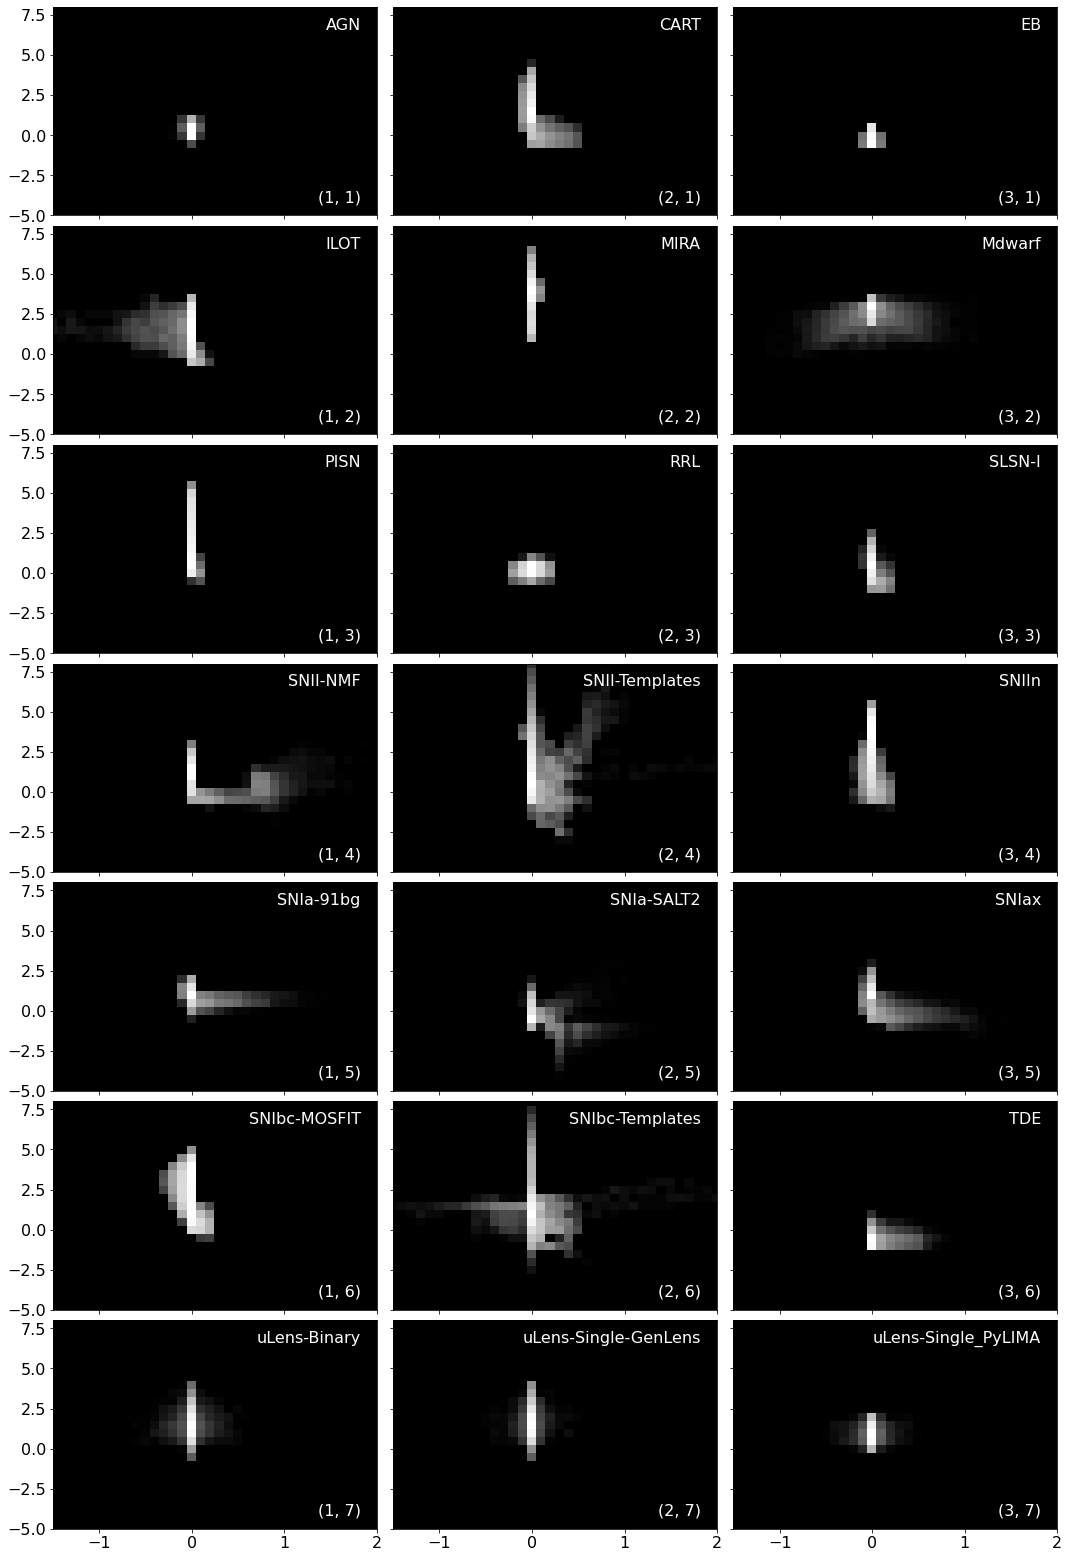

In [9]:
Band1 = 'g'
Band2 = 'i'
dT1 = 60
dT2 = 450

Space = 0.05
ColNo = 3
RowNo = 7

fig, axs = plt.subplots(RowNo, ColNo, figsize = (18, 4*RowNo), sharex=True, sharey=True)
fig.subplots_adjust(hspace=Space, wspace=Space)
axsflat = axs.flatten()

ii=0

for EventName in EventNames:
    
    print('|', end='')

    if EventName == 'V19_CC+HostXT'or 'KN' in EventName:
        continue
    for CubeFileName in CubeFileNames:
        if EventName in CubeFileName:
            break
            
    CubeFilePath = os.path.join(PathCubeFolder, CubeFileName)

    with open(CubeFilePath, 'rb') as f:
        InfoDict = pickle.load(f)
        Cube = pickle.load(f)
        
    CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)
    np.nan_to_num(CubeNorm, copy=False);
    
    Map = Enquiry(CubeNorm, InfoDict, Band1, Band2, dT1, dT2)    
    
    Map = Map*100000
    
    axsflat[ii].pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1,
                      norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
    axsflat[ii].text(0.95, 0.95, EventName, c='w', ha='right', va='top', transform=axsflat[ii].transAxes)    
    axsflat[ii].text(0.95, 0.05, '({}, {})'.format(ii%3+1, ii//3+1), 
                     c='w', ha='right', va='bottom', transform=axsflat[ii].transAxes)  
    
    ii += 1
        
axs[0,0].set_xlim([-1.5, 2])
axs[0,0].set_ylim([-5, 8])
    # plt.title('Filters: {}, {}  Time Gaps: {}, {}'.format(Band1, Band2, dT1, dT2))
    # plt.colorbar()
    
# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor="none", bottom=False, left=False )

# plt.xlabel('Time (days)', fontsize=15, labelpad=15)
# if Prop == 'SIM_MAGOBS':
#     if Space==True:
#         plt.ylabel('Apparent Magnitude', fontsize=15, labelpad=25)
#     else:
#         plt.ylabel('Apparent Magnitude', fontsize=15)
# else:
#     if Space==True:
#         plt.ylabel(Prop, fontsize=15, labelpad=20)        
#     else:
#         plt.ylabel(Prop, fontsize=15)


In [10]:
FilePath = '/global/homes/l/lianming/Presto-Color-2/data/P1Day_Interp/KN_B19_Interp.pkl'

In [11]:
with open(FilePath, 'rb') as f:
        Interp_load = pickle.load(f)
        TimeRange_load = pickle.load(f)  

In [12]:
data6060 = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 60, 60, PointsPDay=12, ObjNo=100, SeedObj=113)
data45060 = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 450, 60, PointsPDay=12, ObjNo=100, SeedObj=113)
data60450 = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 60, 450, PointsPDay=12, ObjNo=100, SeedObj=113)
data60300 = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 60, 300, PointsPDay=12, ObjNo=100, SeedObj=113)

In [ ]:
Band1 = 'g'
Band2 = 'z'
TimeGaps = [ [60, 60], [450, 60], [60, 450] ]
thr = 0.003

jj = 2

Space = 0.05
ColNo = 3
RowNo = 7

In [27]:
data6060

array([[ 0.01007318, -0.04007101, -0.04087284, ..., -0.04141808,
         0.1949592 , -0.06216606],
       [ 1.23345702,  1.46302699,  1.50872374, ...,  1.28447538,
         0.85789459,  1.62176923]])

In [21]:
np.arange(60, 360, 60)

array([ 60, 120, 180, 240, 300])

In [13]:
DataKN = [data6060, data45060, data60450]

In [25]:
len(dT1s)

5

||||||

(-5.0, 8.0)

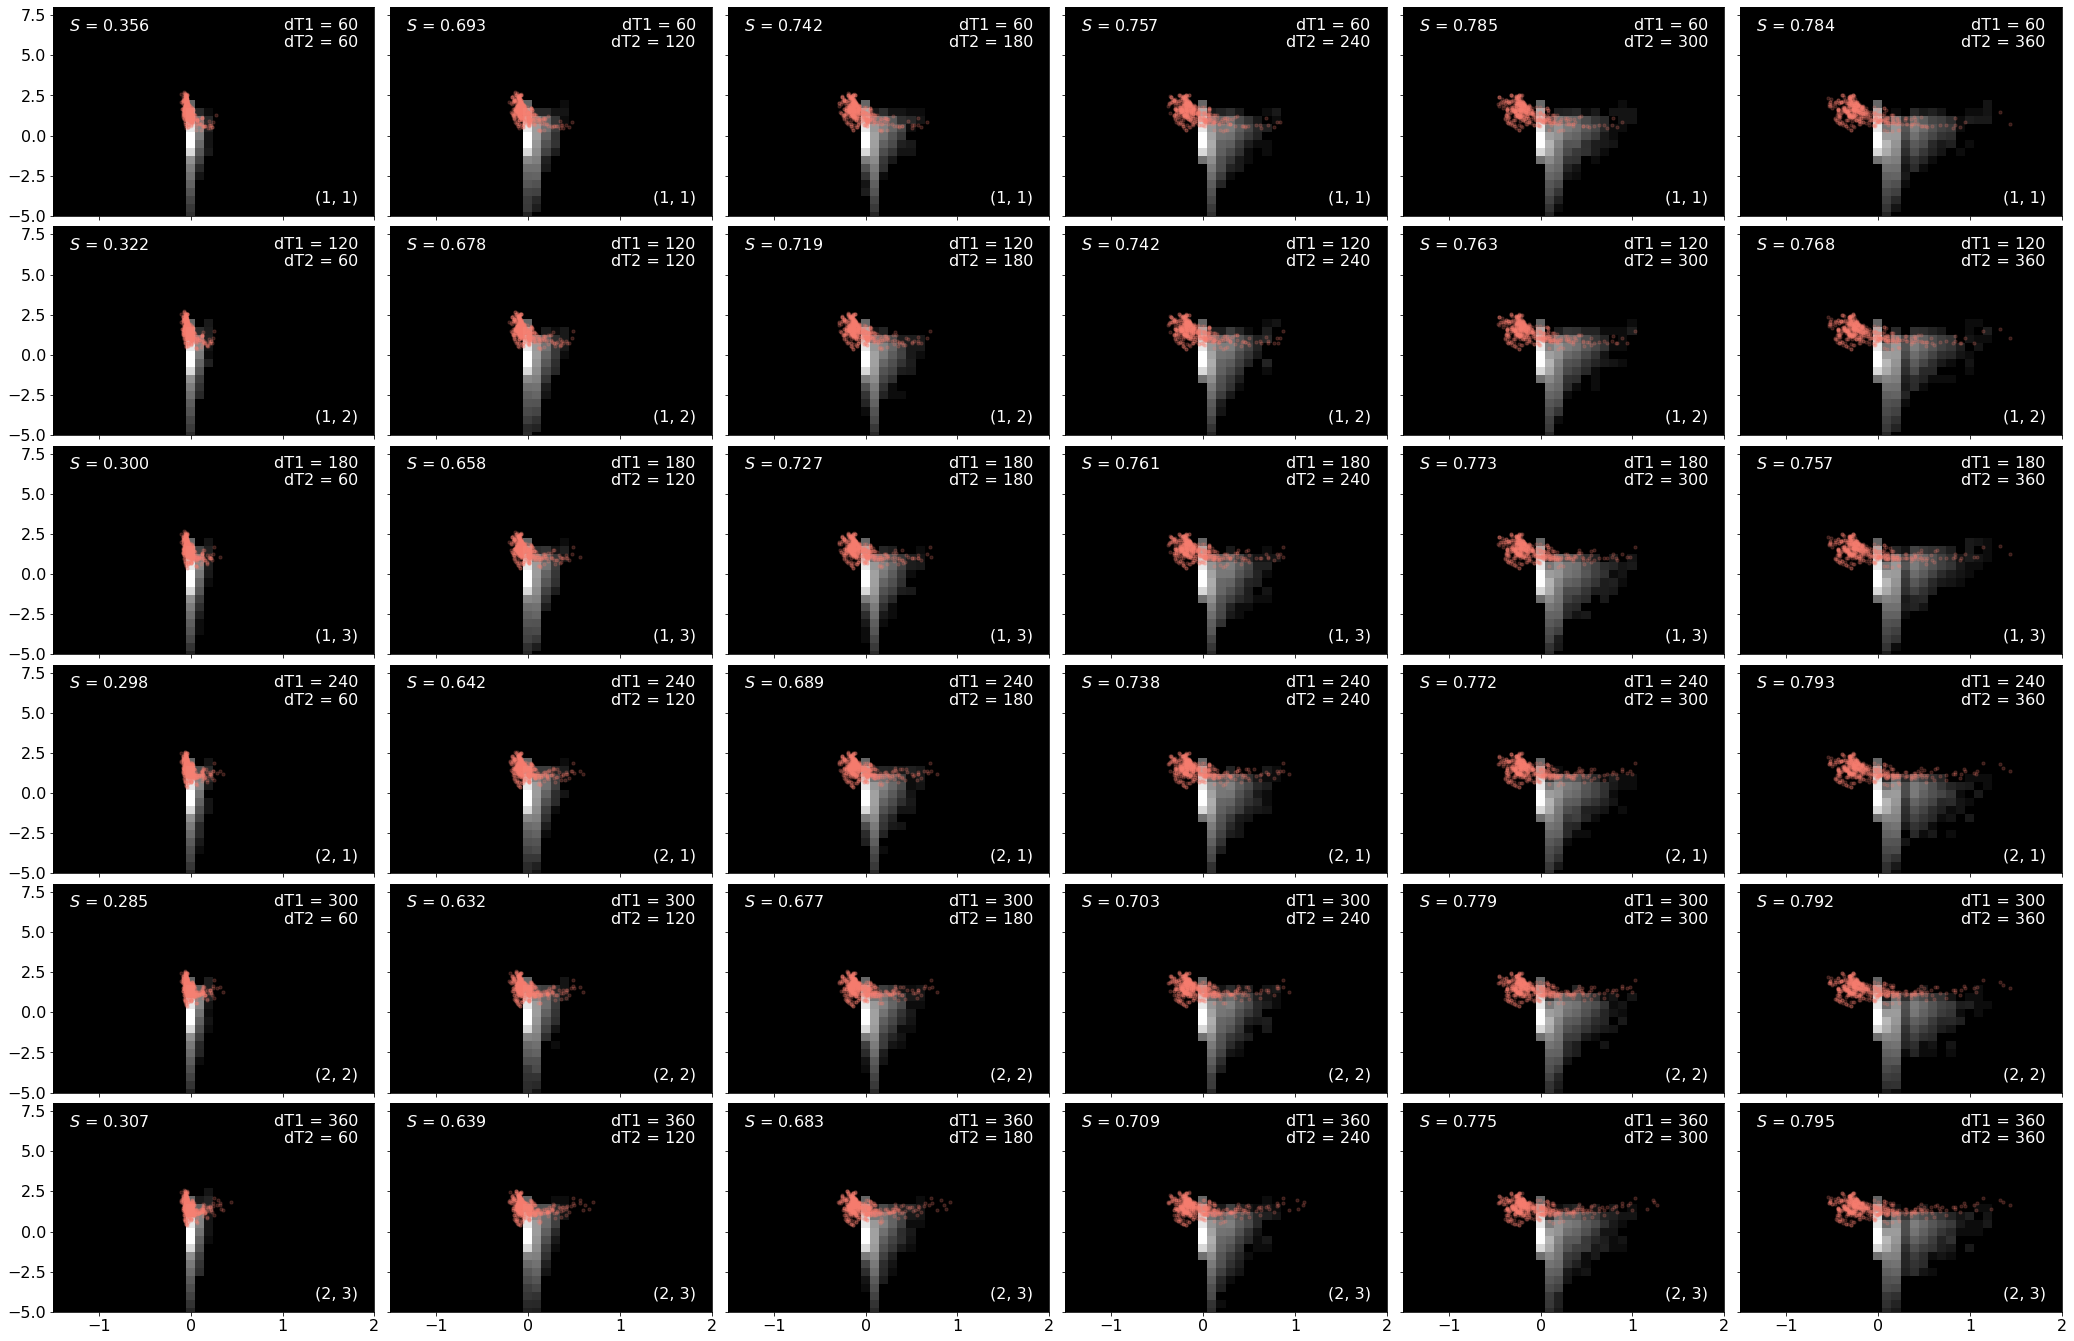

In [45]:
Band1 = 'g'
Band2 = 'z'
dT1s = np.arange(60, 361, 60)
dT2s = np.arange(60, 361, 60)

thr = 0.003
Space = 0.05
ColNo = len(dT2s)
RowNo = len(dT1s)

EventName = 'SNIa-SALT2'

for CubeFileName in CubeFileNames:
    if EventName in CubeFileName:
        break
            
CubeFilePath = os.path.join(PathCubeFolder, CubeFileName)

with open(CubeFilePath, 'rb') as f:
    InfoDict = pickle.load(f)
    Cube = pickle.load(f)
        
# CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)
# np.nan_to_num(CubeNorm, copy=False);


fig, axs = plt.subplots(RowNo, ColNo, figsize = (6*ColNo, 4*RowNo), sharex=True, sharey=True)
fig.subplots_adjust(hspace=Space, wspace=Space)

for ii, dt1 in enumerate(dT1s):
    print('|', end='')
    for jj, dt2 in enumerate(dT2s):
        
        DataKN = Functions.CalculateMap(Interp_load, TimeRange_load, Band1, Band2, dt1, dt2, PointsPDay=12, ObjNo=100, SeedObj=113)
        FTHist,_,_ = np.histogram2d(DataKN[0], DataKN[1], bins=[InfoDict['BinMag'], InfoDict['BinColor']])
        
        Map = Enquiry(Cube, InfoDict, Band1, Band2, dt1, dt2)

        # Scores    
        Mask = Map < thr    
        Score1 = np.sum(FTHist[Mask]) / np.sum(FTHist)    
        # Score2 = 1 - np.sum( Map*FTHist ) / np.sum(FTHist)

        # Map = Map*100000

        axs[ii, jj].pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1,
                          norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
        axs[ii, jj].scatter(DataKN[0], DataKN[1], c='salmon', s=10, alpha=0.2)
        axs[ii, jj].text(0.95, 0.95, 'dT1 = {}\ndT2 = {}'.format(dt1, dt2), c='w', ha='right', va='top', transform=axs[ii, jj].transAxes)    
        # axs[ii, jj].text(0.05, 0.95, '$S$ = {:.3f}\n$P$ = {:.3f}'.format(Score1, Score2), 
        #                  c='w', ha='left', va='top', transform=axs[ii, jj].transAxes)
        axs[ii, jj].text(0.05, 0.95, '$S$ = {:.3f}'.format(Score1), 
                 c='w', ha='left', va='top', transform=axs[ii, jj].transAxes)
        axs[ii, jj].text(0.95, 0.05, '({}, {})'.format(ii//3+1, ii%3+1), 
                         c='w', ha='right', va='bottom', transform=axs[ii, jj].transAxes)  
        
axs[0,0].set_xlim([-1.5, 2])
axs[0,0].set_ylim([-5, 8])
    # plt.title('Filters: {}, {}  Time Gaps: {}, {}'.format(Band1, Band2, dT1, dT2))
    # plt.colorbar()
    
# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor="none", bottom=False, left=False )

# plt.xlabel('Time (days)', fontsize=15, labelpad=15)
# if Prop == 'SIM_MAGOBS':
#     if Space==True:
#         plt.ylabel('Apparent Magnitude', fontsize=15, labelpad=25)
#     else:
#         plt.ylabel('Apparent Magnitude', fontsize=15)
# else:
#     if Space==True:
#         plt.ylabel(Prop, fontsize=15, labelpad=20)        
#     else:
#         plt.ylabel(Prop, fontsize=15)
